In [2]:
#Librerias
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import math

In [3]:
#Importar datos
df = pd.read_excel("EX1_Multiple_lineal_regression_Dataset.xlsx")
df.head(2)

,Estudiante,Calificación de estadística,Calificación del examen,Clases perdidas
0,1,85,65,1
1,2,74,50,7


In [4]:
# Seleccionar variables
n = len(df)
x1 = "Calificación del examen"
x2 = "Clases perdidas"
y = "Calificación de estadística"

In [5]:
# Crear resultados
variables_x = [x1, x2]
variable_y = y
k = len(variables_x) # número de variables independientes
modelo = LinearRegression() # generamos la regresión lineal
modelo.fit(df[variables_x], df[variable_y]) # entrenamos el modelo
print ('Coeficientes: ', modelo.coef_) # obtenemos los coeficientes de las variables independientes
print ('Intercepción: ', modelo.intercept_)

Coeficientes:  [0.92167844 0.28424953]
Intercepción:  27.54669998276755


In [6]:
# Ecuación del plano (y):
ecuacion_plano = f'y = {round(modelo.intercept_, 6)} + {round(modelo.coef_[0], 6)}·x1 + {round(modelo.coef_[1], 6)}·x2'

# Error Estándard de la estimación múltiple:
y_pred = modelo.predict(df[variables_x])
sce = np.sum((df[variable_y] - y_pred) ** 2)
err_estand_estim_multiple = math.sqrt(sce / (n - (k + 1)))

# Suma de Cuadrados de la regresión (SCR):
y_pred = modelo.predict(df[variables_x])
y_mean = np.mean(df[variable_y])
suma_cuadrados_scr = np.sum((y_pred - y_mean)**2)

# Suma Total de Cuadrados (STC):
y_mean = np.mean(df[variable_y])
sumat_total_cuadrados_stc = np.sum((df[variable_y] - y_mean)**2)

# Coeficiente de Determinación Múltiple (R²):
coef_det_multiple_r2 = round(r2_score(df[variable_y], modelo.predict(df[variables_x])), 4)

# Coeficiente Ajustado de Determinación Múltiple (R² ajustada):
coef_ajust_det_multiple_r2ajus = 1 - ((1 - modelo.score(df[variables_x], df[variable_y])) * (n - 1) / (n - k - 1))

# Coeficiente de Correlación Múltiple (R):
coef_correl_multiple_r = np.sqrt(coef_det_multiple_r2)

In [7]:
# Resumen:
print(f'Ecuación del plano: {ecuacion_plano}')
print(f'Error Estándard de la estimación múltiple: {err_estand_estim_multiple}')
print(f'Suma de Cuadrados de la regresión (SCR): {suma_cuadrados_scr}')
print(f'Suma Total de Cuadrados (STC): {sumat_total_cuadrados_stc}')
print (f'Coeficiente de determinación Múltiple (R²): {coef_det_multiple_r2 * 100}%')
print(f'Coeficiente Ajustado de Determinación Múltiple (R²ajustada): {coef_ajust_det_multiple_r2ajus  * 100}%')
print(f'Coeficiente de Correlación Múltiple (R): {coef_correl_multiple_r}')

Ecuación del plano: y = 27.5467 + 0.921678·x1 + 0.28425·x2
Error Estándard de la estimación múltiple: 4.517300794915954
Suma de Cuadrados de la regresión (SCR): 544.5959417542648
Suma Total de Cuadrados (STC): 728.25
Coeficiente de determinación Múltiple (R²): 74.78%
Coeficiente Ajustado de Determinación Múltiple (R²ajustada): 69.17733317003344%
Coeficiente de Correlación Múltiple (R): 0.8647543003651385


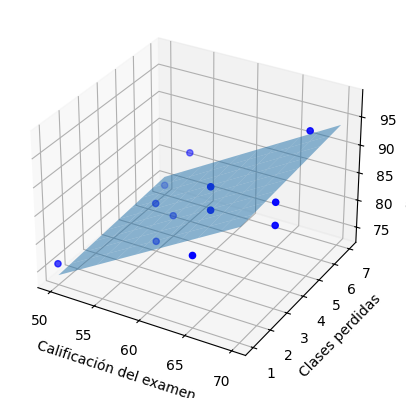

In [8]:
# Gráfica en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[x1], df[x2], df[y], color='blue')
# Crear un meshgrid para el plano
x = np.linspace(df[x1].min(), df[x1].max(), num=10)
y = np.linspace(df[x2].min(), df[x2].max(), num=10)
x, y = np.meshgrid(x, y)
# Calcular los valores z (Calificación estadística) del plano
z = modelo.intercept_ + modelo.coef_[0] * x + modelo.coef_[1] * y
# Graficar el plano
ax.plot_surface(x, y, z, alpha=0.5)
ax.set_xlabel(x1)
ax.set_ylabel(x2)
ax.set_zlabel("calificacion_estad")
plt.show()

In [9]:
# Generar predicción 

calificacion_examen_nuevas = 60
clases_perdidas_nuevas = 4

prediccion_nueva = pd.DataFrame({x1: [calificacion_examen_nuevas], x2: [clases_perdidas_nuevas]})
nueva_nota_estad_prediccion = modelo.predict(prediccion_nueva)
print('La predicción de la nueva nota de estadística con una nota de', calificacion_examen_nuevas, 'en el exámen y', clases_perdidas_nuevas, 'clases perdidas es', round(nueva_nota_estad_prediccion[0], 3))

La predicción de la nueva nota de estadística con una nota de 60 en el exámen y 4 clases perdidas es 83.984
